# Проект: Принятие решений в бизнесе

## Введение

### Контекст

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга я подготовил список гипотез для увеличения выручки.

### Цели проекта

Проект состоит из двух частей и имеет следующие цели:

**Часть 1. Приоритизация гипотез.**
* В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**
* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Часть 2. Анализ A/B-теста**
* Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задача**
Проанализируйте A/B-тест:
* Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
* Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
* Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
* Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
* Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
* Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.


### Загрузка данных

In [1]:
# Импорт библиотек
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import datetime as dt
from datetime import datetime, timedelta
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
# Настройка формата отображения чисел с типом  float в pandas
pd.set_option("display.float_format", "{:.2f}".format)
register_matplotlib_converters()
pd.options.display.max_colwidth = 130 # изменяем максимальную ширину колонки до 130

In [2]:
#Загрузка файлов с данными в датафреймы pandas
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

### Предобработка данных

In [3]:
#Функция для визуализации пропусков и дубликатов в данных
def vis_nan_dup(df):
    # вывод информации о 
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print('Пропуски в процентах по столбцу:','{} - {}%'.format(col, round(pct_missing*100)))
        print('Количество явных дубликатов:',df.duplicated().sum())

In [4]:
#Функция для вывода всей общей информации
def full_info(df):
    return display(df.sample(9)), \
    display(df.describe()), \
    display(df.info()), \
    display(df.shape), \
    display(vis_nan_dup(df))

In [5]:
full_info(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3


,Reach,Impact,Confidence,Efforts
count,9.00,9.00,9.00,9.00
mean,4.78,4.78,5.56,4.89
std,3.15,3.19,3.05,2.80
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00
50%,3.00,3.00,7.00,5.00
75%,8.00,7.00,8.00,6.00
max,10.00,10.00,9.00,10.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

(9, 5)

Пропуски в процентах по столбцу: Hypothesis - 0%
Количество явных дубликатов: 0
Пропуски в процентах по столбцу: Reach - 0%
Количество явных дубликатов: 0
Пропуски в процентах по столбцу: Impact - 0%
Количество явных дубликатов: 0
Пропуски в процентах по столбцу: Confidence - 0%
Количество явных дубликатов: 0
Пропуски в процентах по столбцу: Efforts - 0%
Количество явных дубликатов: 0


None

(None, None, None, None, None)

In [6]:
#Переведем названия столбцов в нижний регистр.
hypothesis.columns = [name.lower() for name in hypothesis.columns]

<div style="border:solid Blue 2px; padding: 20px">
    
Файл с гипотезами в порядке, нет ни пропусков, ни дубликатов. Привели название столбцов в нижний регистр.
    
    Содержание файла следующее:
 
- Hypothesis — описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.
</div>

In [7]:
full_info(orders)

,transactionId,visitorId,date,revenue,group
1064,606354126,3115684948,2019-08-11,18350,A
265,3743515850,2579882178,2019-08-18,1922,A
377,42506358,535857429,2019-08-25,3450,B
50,2236784294,1690383497,2019-08-16,2970,B
162,2634363174,2892265953,2019-08-17,1990,A
198,2206098194,2880866577,2019-08-02,1690,A
41,2594268419,237748145,2019-08-15,1090,A
741,2142284513,1438226485,2019-08-09,3354,B
637,1869578588,195530970,2019-08-09,17030,B


,transactionId,visitorId,revenue
count,1197.00,1197.00,1197.00
mean,2155621385.53,2165960143.10,8348.01
std,1229084904.76,1236014192.15,39191.13
min,1062393.00,5114589.00,50.00
25%,1166775572.00,1111826046.00,1220.00
50%,2145193898.00,2217984702.00,2978.00
75%,3237740112.00,3177606451.00,8290.00
max,4293855558.00,4283872382.00,1294500.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

(1197, 5)

Пропуски в процентах по столбцу: transactionId - 0%
Количество явных дубликатов: 0
Пропуски в процентах по столбцу: visitorId - 0%
Количество явных дубликатов: 0
Пропуски в процентах по столбцу: date - 0%
Количество явных дубликатов: 0
Пропуски в процентах по столбцу: revenue - 0%
Количество явных дубликатов: 0
Пропуски в процентах по столбцу: group - 0%
Количество явных дубликатов: 0


None

(None, None, None, None, None)

<div style="border:solid Blue 2px; padding: 20px">
    
Файл с заказами в порядке, нет ни пропусков, ни дубликатов, но требуется изменить тип данных в столбце date
    
Содержание файла следующее:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.
</div>

In [8]:
full_info(visitors)

,date,group,visitors
0,2019-08-01,A,719
17,2019-08-18,A,668
48,2019-08-18,B,737
43,2019-08-13,B,769
6,2019-08-07,A,644
26,2019-08-27,A,711
49,2019-08-19,B,487
10,2019-08-11,A,718
54,2019-08-24,B,378


,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

(62, 3)

Пропуски в процентах по столбцу: date - 0%
Количество явных дубликатов: 0
Пропуски в процентах по столбцу: group - 0%
Количество явных дубликатов: 0
Пропуски в процентах по столбцу: visitors - 0%
Количество явных дубликатов: 0


None

(None, None, None, None, None)

<div style="border:solid Blue 2px; padding: 20px">
    
Файл с посетителями в порядке, нет ни пропусков, ни дубликатов, но требуется изменить тип данных в столбце date
    
Содержание файла следующее:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста
</div>

In [9]:
#Изменение типов данных
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

### Дополнительные проверки:

In [10]:
#Проверим совпадают ли даты в файлах
display('Период заказов', orders['date'].min(), orders['date'].max(),
'Период пользователей', visitors['date'].min(), visitors['date'].max())

'Период заказов'

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

'Период пользователей'

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [11]:
#Посмотрим сколько у нас групп в АВ-тесте:
orders['group'].unique()

array(['B', 'A'], dtype=object)

Данные для АВ-теста представлены двумя группами - А и В.

In [12]:
#Проверим также выборки на наличие пользователей, попавших в обе группы и узнаем Количество пользователей в группах:
ab_users = orders.groupby('visitorId').agg({'group': ['nunique', 'unique']})
ab_users.columns = ['groups', 'group_name']
ab_users = ab_users.query('groups > 1')
display(ab_users.head())
print('Общее количество пользователей:', orders['visitorId'].nunique())
print('Количество пользователей в группе А:', orders.query('group == "A"')['visitorId'].nunique())
print('Количество пользователей в группе В:', orders.query('group == "B"')['visitorId'].nunique())
print('Количество пользователей, попавших в обе группы:',len(ab_users))

,groups,group_name
visitorId,,
8300375,2,"[B, A]"
199603092,2,"[A, B]"
232979603,2,"[B, A]"
237748145,2,"[B, A]"
276558944,2,"[B, A]"


Общее количество пользователей: 1031
Количество пользователей в группе А: 503
Количество пользователей в группе В: 586
Количество пользователей, попавших в обе группы: 58


Пользователей, находящихся сразу в обеих группах, - 58, это почти по 10% в каждой группе. Их участие сразу в обоих группах может субъективно исказить результаты, а также повлиять на расчет выбросов. Можно было бы попробовать исключить этих пользователей из заказов, но корректно исключить их  не получится, так как данные в этом датасете агрегированы. Поэтому оставим, как есть.

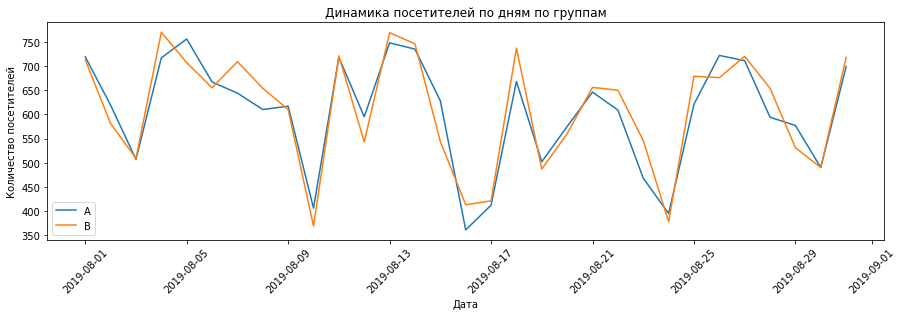

In [13]:
#Посмотрим динамику посетителей по дням по группам:
plt.figure(figsize=(15, 4))
visitors_A = visitors[visitors['group']=='A']
visitors_B = visitors[visitors['group']=='B']
plt.plot(visitors_A['date'], visitors_A['visitors'], label='A')
plt.plot(visitors_B['date'], visitors_B['visitors'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title("Динамика посетителей по дням по группам")
plt.ylabel("Количество посетителей")
plt.xlabel("Дата")

plt.show()

Как видно из графика, динамика посетителей по дням совпадает в обеих группах, находится в диапазоне от 350 до 750 посетителей в день и имеет ярко выраженную цикличность.

<div style="border:solid Blue 2px; padding: 20px">
    <b>Вывод:</b> данные готовы к анализу, были изменены типы данных в столбцах date, дубликаты и пропуски не обнаружены; названия столбцов в датасете гипотез приведены к нижнему регистру.
</div>

## Часть 1. Приоритизация гипотез

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [14]:
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)
hypothesis.sort_values(by = 'ICE', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Исходя из фреймворка ICE, мы видим, что наиболее перспективные гипотезы под номера 8, 0 и 7.

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [15]:
hypothesis['RICE'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)
hypothesis.sort_values(by = 'RICE', ascending = False) 

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


Исходя из фреймоврка RICE, мы видим, что наиболее перспективные гипотезы идут под номерами 7, 2, 0.

### Отличия результатов приоритизации гипотез при применении RICE вместо ICE.

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:**
        
Отличия результатов связаны с одни важным отличием в учитываемых параметрах, которые фреймворки используют для приоритизации:
    
    Фреймворк ICE приоритизирует гипотезы с учетом следующих параметров:

Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
Efforts — сколько стоит протестировать эту гипотезу.
    
    Фреймворк RICE приоритизирует гипотезы с учетом следующих параметров:

Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
Efforts — сколько стоит протестировать эту гипотезу;
Reach — скольких пользователей затронет изменение, которое вы хотите внести.
    
    В отличии от ICE, фреймворк RICE использует в качестве параметра также и охват количества пользователей, которых затронет предполагаемое изменение - REACH.
    
    По этой причине гипотеза ТОП-1 фрейма ICE - Запустить акцию, дающую скидку на товар в день рождения c первого места в ICE переместилась в RICE в середину списка т.к. имеет REACH всего 1. Тогда как гипотеза ТОП-1 RICE - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок имеет REACH - 10 максимальный и общий рейтинг с большим отрывом опережающий другие гипотезы.
    
**За наиболее приоритетную гипотезу предлагаю взять - ТОП-1 RICE - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Как запасную можно взять - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	т.к. она показала хорошие результаты в обоих фреймах**
    
</div>

## Часть 2. Анализ A/B-теста


#### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

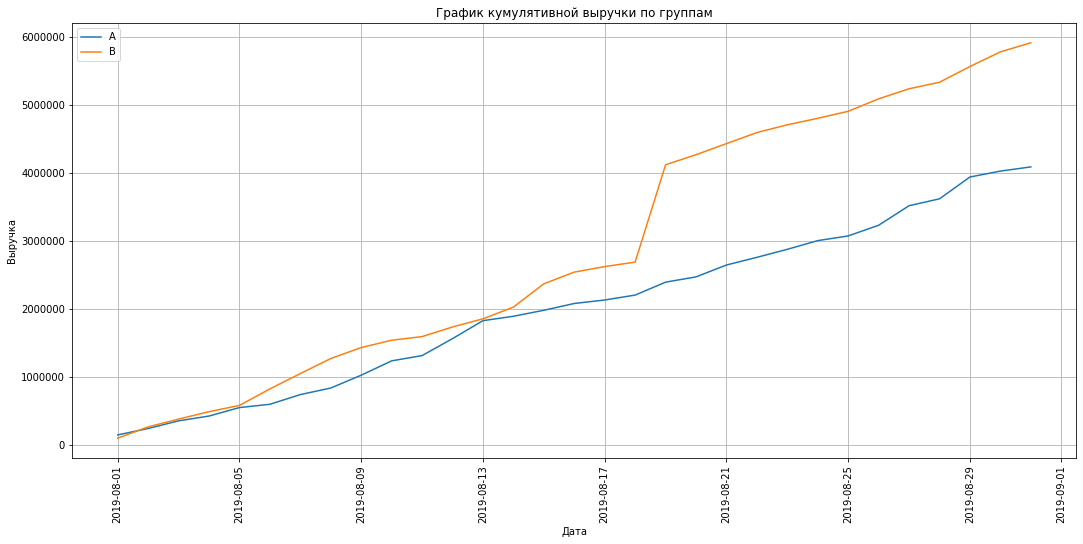

In [16]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

plt.figure(figsize=(18,8))
plt.grid()
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')

plt.ticklabel_format(style='plain') # предотвращает "научное" обозначение на осях
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation = 90)
plt.legend();

По графикам можно наблюдать, что выручка группы В стабильно выше выручки группы А. Также заметен резкий скачок группы В с 18 по 19 августа, скорее всего из-за какого-то крупного заказа. В принципе виден рост выручки - причинами также могут быть что мог увеличится средний чек, а могло увеличится среднее количество заказов на посетителя.

#### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

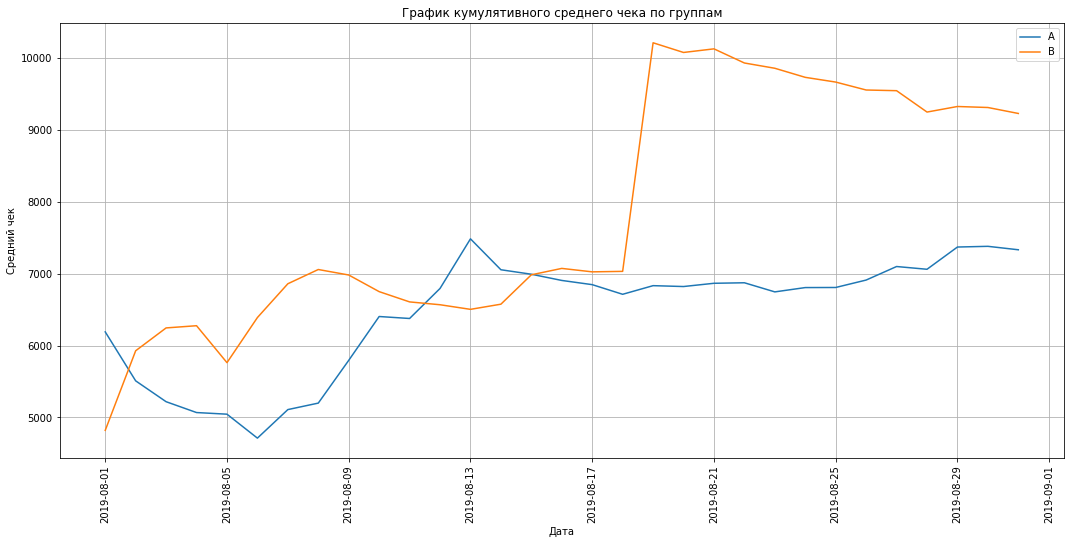

In [17]:
plt.figure(figsize=(18,8))
plt.grid()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation = 90)
plt.legend();

Здесь мы так же видим очень резкий скачек среднего чека с последующим снижением в группе В в то время и резкое движение чека группы В вверх 18 августа, как у группы А средний чек держится на одном уровне с середины месяца, что только подтвержает нашу догадку о появлении какого-то количества слишком больших заказов.

#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

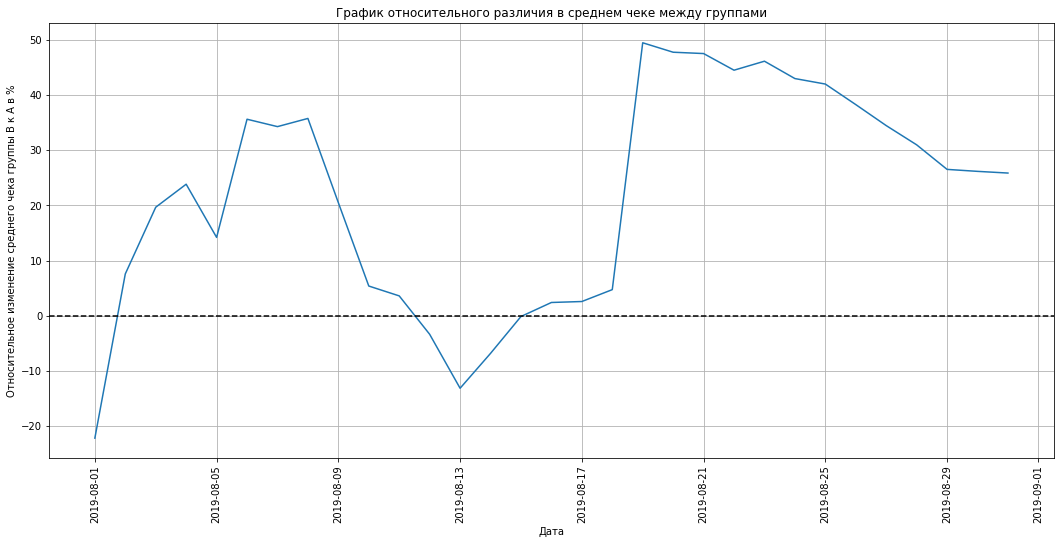

In [18]:
plt.figure(figsize=(18,8))
plt.grid()
plt.title('График относительного различия в среднем чеке между группами')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего чека группы В к А в %')
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])*100-100)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation = 90);

Средний чек пользователей группы В существенно превышает аналогичный показатель группы А. Однако неизвестно, не является ли это следствием единичных аномально крупных покупок или пользователи группы В просто более состоятельны и т.п.

#### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

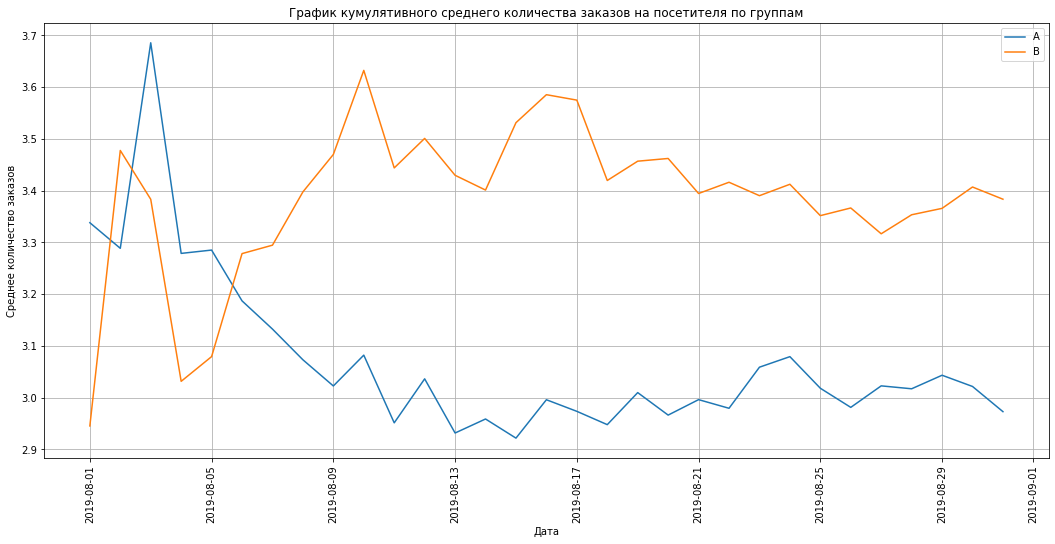

In [19]:
plt.figure(figsize=(18,8))
plt.grid()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion']*100, label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion']*100, label='B')
plt.xticks(rotation = 90)
plt.legend();

В начале теста группа А имела большее среднее количество заказов на посетителя (3,7 в пике),чем В, но уже после 2019-08-05 графики пересеклись и среднее количество заказов на посетителя группы B стало выше и сохраняла свое превосходство  до конца теста (3,4 в группе B против 3 в группе A)

#### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

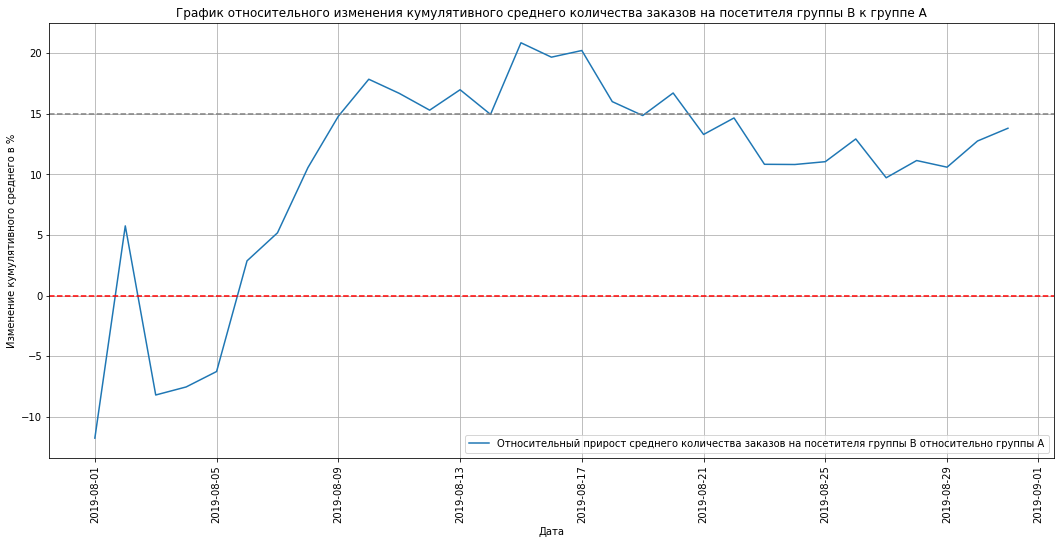

In [20]:
plt.figure(figsize=(18,8))
plt.grid()
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изменение кумулятивного среднего в %')
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']*100-100, label="Относительный прирост среднего количества заказов на посетителя группы B относительно группы A")
plt.xticks(rotation = 90)
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=15, color='grey', linestyle='--')
plt.legend();

Почти с самого начала теста группа B лидирует по среднему количеству заказов на посетителя и достигает пика 2019-08-17. Начиная с этой даты среднее количество заказов на посетителя снижается с 20% в пике до ~15%. С десятого дня месяца среднее количество заказов на посетителя у группы В на уровне 15% выше аналогичного параметра группы А. Относительное изменение кумулятивного среднего чека группы В повторяет поведение графика кумулятивного среднего чека.

#### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

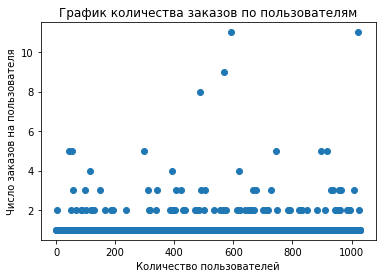

In [21]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'transactions']

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.title('График количества заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Число заказов на пользователя')
plt.scatter(x_values, ordersByUsers['transactions']); 

Пользователей, заказавших более 2-х раз мало. Можно считать таких пользователей аномальными. Но более точный ответ дадут перцентили.

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [22]:
np.percentile(ordersByUsers['transactions'], [95, 99])

array([2., 4.])

Не более 5% пользователей совершали больше 2-х заказов и не более 1% пользователей больше 4-х. В качестве границы для аномальных пользователей выберем 95-ый перцентиль: всех пользователей, у которых более 2-х транзакций будем считать аномальными.

#### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

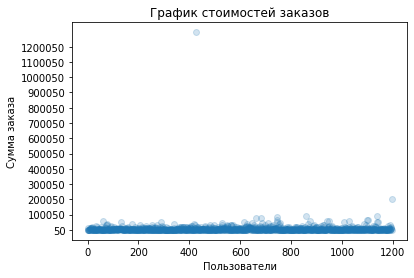

In [23]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], alpha=0.2)
plt.ticklabel_format(useOffset=False, style='plain'); # предотвращает "научное" обозначение на осях
plt.yticks(np.arange(min(orders['revenue']), max(orders['revenue']), 100000)); # изменяет частоту отметок по оси y (каждые 100 тыс.)
plt.title('График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Сумма заказа')
plt.show()

Заказов стоимостью больше 100 тыс. почти нет. Виден 1 заказ размером более 1.2 млн - вот он тот самый выброс в группе В

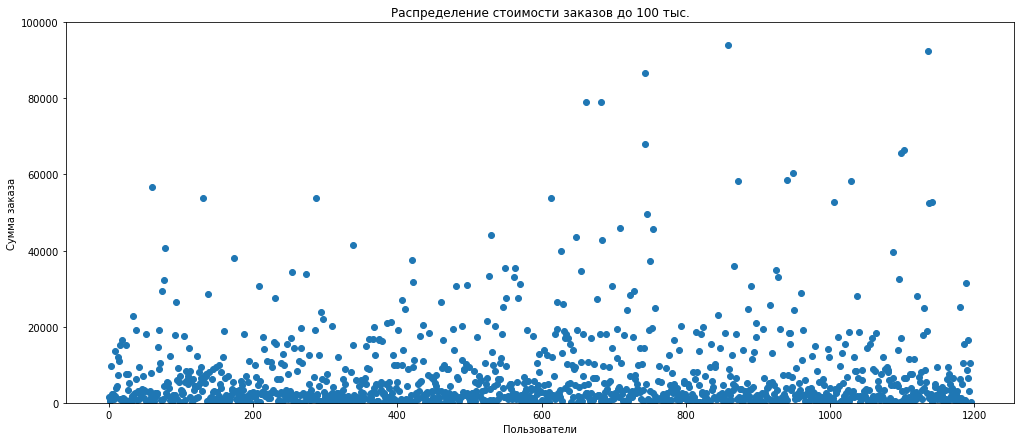

In [24]:
# выведем точечный график распределение стоимости заказов до 100 тысяч
plt.figure(figsize=(17,7))
plt.scatter(pd.Series(range(0,len(orders['revenue']))), orders['revenue'])
plt.title('Распределение стоимости заказов до 100 тыс.')
plt.ylabel('Сумма заказа')
plt.xlabel('Пользователи')
plt.ylim(0,100000)
plt.show()

На графиках распределения мы видим, что основная масса сумм заказов располагаются на уровне до 25-28 тыс. При это  встречаются заказы до 60 тысяч и есть единичные заказы от 75 тыс до более 1.2 млн.

#### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.## Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [25]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов стоят дороже 28 тыс., и не более 1% стоят дороже 58 тыс. В качестве границы для аномальных покупок выберем 95-ый перцентиль: покупки дороже 28 тыс. будем считать аномальными.

### Изучение статистических значимостей

#### Подготовка сырых данных

In [26]:
# создадим таблицы ежедневного количества пользователей по группам
# и таблицы с кумулятивным количеством пользователей к дате по группам
visitors_daily_A = visitors[visitors['group']=='A'][['date', 'visitors']]
visitors_daily_A.columns = ['date', 'visitors_per_date_A']

visitors_daily_B = visitors[visitors['group']=='B'][['date', 'visitors']]
visitors_daily_B.columns = ['date', 'visitors_per_date_B']


visitors_cummulative_A = visitors_daily_A.apply(lambda x: 
                            visitors_daily_A[visitors_daily_A['date'] <= x['date']].agg({
                                'date' : 'max', 'visitors_per_date_A' : 'sum'}), axis=1)
visitors_cummulative_A.columns = ['date', 'visitors_cummulative_A']

visitors_cummulative_B = visitors_daily_B.apply(lambda x: 
                            visitors_daily_B[visitors_daily_B['date'] <= x['date']].agg({
                                'date' : 'max', 'visitors_per_date_B' : 'sum'}), axis=1)
visitors_cummulative_B.columns = ['date', 'visitors_cummulative_B']

In [27]:
# создадим таблицы с количеством заказов и размером выручки по группам
# и затем создадим таблицы с кумулятивным количеством заказов и выручки
orders_daily_A = orders[orders['group']=='A'][['date', 'transactionId','visitorId', 
                                               'revenue']].groupby(
    'date', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
orders_daily_A.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

orders_daily_B = orders[orders['group']=='B'][['date', 'transactionId','visitorId', 
                                               'revenue']].groupby(
    'date', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
orders_daily_B.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']


orders_cummulative_A = orders_daily_A.apply(
    lambda x: orders_daily_A[orders_daily_A['date'] <= x['date']].agg({
                'date' : 'max',
                'orders_per_date_A' : 'sum',
                'revenue_per_date_A' : 'sum'}), axis=1).sort_values(by=['date'])
orders_cummulative_A.columns = ['date', 'orders_сummulative_A', 'revenue_сummulative_A']

orders_cummulative_B = orders_daily_B.apply(
    lambda x: orders_daily_B[orders_daily_B['date'] <= x['date']].agg({
                'date' : 'max',
                'orders_per_date_B' : 'sum',
                'revenue_per_date_B' : 'sum'}), axis=1).sort_values(by=['date'])
orders_cummulative_B.columns = ['date', 'orders_сummulative_B', 'revenue_сummulative_B']

In [28]:
# объединим все созданные таблицы в одну по дате
data = (visitors_daily_A
        .merge(visitors_daily_B, left_on='date', right_on='date', how='left')
        .merge(visitors_cummulative_A, left_on='date', right_on='date', how='left')
        .merge(visitors_cummulative_B, left_on='date', right_on='date', how='left')
        .merge(orders_daily_A, left_on='date', right_on='date', how='left')
        .merge(orders_daily_B, left_on='date', right_on='date', how='left')
        .merge(orders_cummulative_A, left_on='date', right_on='date', how='left')
        .merge(orders_cummulative_B, left_on='date', right_on='date', how='left')
       )

In [29]:
# создадим таблицы с количеством заказов по пользователям для каждой группы
orders_by_visitors_A = orders[orders['group']=='A'].groupby(
    'visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

orders_by_visitors_A.columns = ['visitorId', 'orders']

orders_by_visitors_B = orders[orders['group']=='B'].groupby(
    'visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

orders_by_visitors_B.columns = ['visitorId', 'orders']

sample_A = pd.concat([orders_by_visitors_A['orders'],
                     pd.Series(0, index=np.arange(
                         data['visitors_per_date_A'].sum() -
                         len(orders_by_visitors_A['orders'])),
                               name='orders')],axis=0)

sample_B = pd.concat([orders_by_visitors_B['orders'],
                     pd.Series(0, index=np.arange(
                         data['visitors_per_date_B'].sum() -
                         len(orders_by_visitors_B['orders'])), 
                               name='orders')],axis=0)

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Для определения статистической значимости используем Критерий Манна-Уитни т.к.:
- он проверяет гипотезу о том, что две генеральные совокупности, из которых были отобраны выборки, эквивалентны по расположению.
- это непараметрический статистический критерий, используемый для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно. Позволяет выявлять различия в значении параметра между малыми выборками.


Сформулируем гипотезы:

Н0 : статистически значимых различий в количестве заказов на посетителя между группами нет

Н1 : статистически значимые различия в количестве заказов на посетителя между группами есть

уровень статистической значимости alpha мы возьмем 0.05.

In [30]:
# посчитаем критерий Манна-Уитни к среднему количеству заказов на посетителя
# и относительный прирост данного параметра для группы B

print('Значение p-value для среднего количества заказов на посетителя: {:.3f}'.format(stats.mannwhitneyu(sample_A, sample_B)[1]))

if stats.mannwhitneyu(sample_A, sample_B)[1] < 0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('Относительный прирост среднего количества заказов на посетителя группы B: {:.2%}'.format((sample_B.mean()/sample_A.mean()) - 1))

Значение p-value для среднего количества заказов на посетителя: 0.017
Отвергаем нулевую гипотезу
Относительный прирост среднего количества заказов на посетителя группы B: 13.81%


<div style="border:solid Blue 2px; padding: 20px">
    
**Вывод**
Нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов на посетителя между группами нет - отвергаем. 
Поэтому мы придерживаемся альтернативной гипотезе, что различая в среднем количестве заказов на посетителя есть, а относительный прирост среднего количество заказов на посетителя группы В составляет 13.81%. 
Однако в этих выборках есть выбросы.
    
</div>

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Сформулируем гипотезы:

Н0 : статистически значимых различий в среднем чеке между группами нет

Н1 : статистически значимые различия в среднем чеке между группами есть

уровень статистической значимости alpha мы возьмем 0.05.

In [31]:
# посчитаем критерий Манна-Уитни к среднему чеку
# и относительный прирост среднего чека группы B

pvalue_mean_check = stats.mannwhitneyu(orders.query('group == "A"')['revenue'], orders.query('group == "B"')['revenue'])[1]

print('Значение p-value для среднего чека: {:.3f}'.format(pvalue_mean_check))

if pvalue_mean_check < 0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('Относительный прирост среднего чека группы B: {:.2%}'
        .format((orders.query('group == "B"')['revenue'].mean() / orders.query('group == "A"')['revenue'].mean()) - 1))

Значение p-value для среднего чека: 0.729
Не получилось отвергнуть нулевую гипотезу
Относительный прирост среднего чека группы B: 25.87%


<div style="border:solid Blue 2px; padding: 20px">
    
**Вывод**
Отвергнуть нулевую гипотезу о том, что нету значимых различий в среднем чеке групп не удалось, но при этом относительный прирост среднего чека в группе В составляет 25.87%, что может означать сильное влияние аномальных заказов.
    
</div>

#### Подготовка очищенных данных

In [32]:
# создадим таблицы с аномальными пользователей и выведем их количество и долю
visitors_many_orders = pd.concat(
    [
        orders_by_visitors_A[orders_by_visitors_A['orders'] > np.percentile(ordersByUsers['transactions'], [95])[0]]['visitorId'], 
        orders_by_visitors_B[orders_by_visitors_B['orders'] > np.percentile(ordersByUsers['transactions'], [95])[0]]['visitorId'],
    ], 
    axis = 0
)
visitors_expensive_orders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95])[0]]['visitorId']


abnormal_visitors = (pd.concat([visitors_many_orders, visitors_expensive_orders], axis = 0)
                     .drop_duplicates()
                     .sort_values()
                    )

print('Количество аномальных пользователей:',len(abnormal_visitors))
print('Доля аномальных пользователей {:.2%}'.format(len(abnormal_visitors) / len(orders['visitorId'].unique())))

Количество аномальных пользователей: 74
Доля аномальных пользователей 7.18%


In [33]:
# создадим таблицы с количеством заказов по пользователям для каждой группы без аномальных пользователей
sample_A_filt = pd.concat(
                    [orders_by_visitors_A[np.logical_not(orders_by_visitors_A['visitorId']
                            .isin(abnormal_visitors))]['orders'],
                            pd.Series(0, index=np.arange(data['visitors_per_date_A'].sum() - 
                            len(orders_by_visitors_A['orders'])),
                            name='orders')],
                            axis=0
                         )

sample_B_filt = pd.concat(
                    [orders_by_visitors_B[np.logical_not(orders_by_visitors_B['visitorId']
                           .isin(abnormal_visitors))]['orders'],
                           pd.Series(0, index=np.arange(data['visitors_per_date_B'].sum() - 
                           len(orders_by_visitors_B['orders'])),
                           name='orders')],
                           axis=0
                         )

<div style="border:solid Blue 2px; padding: 20px">
    
**Вывод**
Доля аномальных пользоваателей, которые совершили более 2 заказов и на сумму больше 28 тыс. составляет 7.18%, 
что достаточно много/ далее посмотрим ситуацию по очищенным данным.
    
</div>

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Сформулируем гипотезы:

Н0 : статистически значимых различий в количестве заказов на посетителя между группами нет

Н1 : статистически значимые различия в количестве заказов на посетителя между группами есть

уровень статистической значимости alpha мы возьмем 0.05.

In [34]:
# посчитаем критерий Манна-Уитни к среднему количеству заказов на посетителя для "очищенных" данных
# и относительный прирост данного параметра для группы B
print('Значение p-value для среднего количество заказов на посетителя: {:.3f}'.format(stats.mannwhitneyu(sample_A_filt, sample_B_filt)[1]))

if stats.mannwhitneyu(sample_A_filt, sample_B_filt)[1] < 0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('Относительный прирост среднего количества заказов на посетителя группы B: {:.2%}'.format((sample_B_filt.mean() / sample_A_filt.mean()) - 1))

Значение p-value для среднего количество заказов на посетителя: 0.013
Отвергаем нулевую гипотезу
Относительный прирост среднего количества заказов на посетителя группы B: 17.27%


<div style="border:solid Blue 2px; padding: 20px">
    
**Вывод**
По очищенным данным результат такой же - различия в среднем количестве заказов на посетителя между группами есть. 
А прирост среднего количество заказов на посетителя у группы В составляет 17.27%.
    
</div>

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Сформулируем гипотезы:

Н0 : по очищенным данным статистически значимых различий в среднем чеке между группами нет

Н1 : статистически значимые различия в среднем чеке между группами есть

уровень статистической значимости alpha мы возьмем 0.05.

In [35]:
# посчитаем критерий Манна-Уитни к среднему чеку для очищенных данных 
# и относительный прирост среднего чека группы В

filtered_pvalue_mean_check = stats.mannwhitneyu(
    orders[np.logical_and(orders['group'] == "A", np.logical_not(orders['visitorId'].isin(abnormal_visitors)))]['revenue'],
    orders[np.logical_and(orders['group'] == "B", np.logical_not(orders['visitorId'].isin(abnormal_visitors)))]['revenue'])[1]

print('Значение p-value для среднего чека: {:.3f}'.format(filtered_pvalue_mean_check))


if filtered_pvalue_mean_check < 0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

    
print('Относительный прирост среднего чека группы B: {:.2%}'.format(
    (orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormal_visitors)))]['revenue'].mean()/
     orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormal_visitors)))]['revenue']
     .mean()) - 1))

Значение p-value для среднего чека: 0.738
Не получилось отвергнуть нулевую гипотезу
Относительный прирост среднего чека группы B: -1.96%


<div style="border:solid Blue 2px; padding: 20px">
    
**Вывод**
Здесь так же мы не можем отвергнуть нулевую гипотезу, а значит статистически значимых различий в среднем чеке нету между группами. Однако относительный прирост среднего чека группы В на очищенных данных изменился до -1.96%. Но это может быть вызвано тем, что количество заказов у группы B больше, чем у группы A, за счет чего средний чек становится меньше.
    
</div>

#### Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

## Итоговый вывод

**Предобработка данных:**

На данном этапе получили следующую информацию:

* Общее количество пользователей в тесте: 1031
* Количество пользователей в группе А: 503
* Количество пользователей в группе В: 586
* Количество пользователей, попавших в обе группы: 58

Пользователей, находящихся сразу в обеих группах, - 58, это почти по 10% в каждой группе. Их участие сразу в обоих группах может субъективно исказить результаты, а также повлиять на расчет выбросов. Рекомендуется проверить корректность обработки показа сайта для пользователей и пересмотреть систему тестирования на наличие ошибок.


**Гипотезы**

Перед запуском A/B-теста, нам предстояло выбрать наиболее перспективную гипотезу. У нас сформировался список из 8 гипотез, приоритеты которых мы определили с помощью фреймоворков для приоритезации гипотез - ICE и RICE.

Так как фреймворк ICE не учитывает охват изменений, а наши гипотезы требуют взаимодейтсвия с как можно большим количеством пользователей - мы отказались от фреймоврка ICE и использовали фреймворк RICE. Благодаря этому мы определили, что наиболее приоритетной гипотезой - с наивысшим охватом, хорошими показателями влияния и уверенности при средних затратах на внедрение- является гипотеза **«Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок».** Как запасную можно взять - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей т.к. она показала хорошие результаты в обоих фреймах.



**Анализ результатов A/B-теста:**

мы пришли к следующим выводам:

* Кумулятивная выручка и средний чек группы  В  выше выручки группы А. 

* Прирост кумулятивного среднего количество заказов на посетителя у группы В по факту превышает группу А (на +15-20%)

* В начале теста группа А имела большее среднее количество заказов на посетителя (3,7 в пике),чем В, но уже после 2019-08-05  среднее количество заказов на посетителя группы B стало выше и сохраняла свое превосходство до конца теста (3,4 в группе B против 3 в группе A)

* В группе В оказались пользователи, которые совершили крупные заказы (до 1,2 млн руб), что подняло средний чек группы. Учитывая то, что в группе А такого поведения не наблюдалось.

* Не более 5% пользователей совершали больше 2-х заказов и не более 1% пользователей больше 4-х. В качестве границы для аномальных пользователей выберем 95-ый перцентиль: всех пользователей, у которых более 2-х транзакций будем считать аномальными.

* Встречаются заказы до 60 тысяч и есть единичные заказы от 75 тыс до более 1.2 млн.

* Не более 5% заказов стоят дороже 28 тыс., и не более 1% стоят дороже 58 тыс. В качестве границы для аномальных покупок выберем 95-ый перцентиль: покупки дороже 28 тыс. будем считать аномальными.

**Статистический анализ результатов теста**:

мы пришли к выводам:

Доля аномальных пользоваателей, которые совершили более 2 заказов и на сумму больше 28 тыс. составляет 7.18%, что достаточно много.

**Сырые данные**

Нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов на посетителя между группами нет - отвергаем. Поэтому мы придерживаемся альтернативной гипотезе, что различая в среднем количестве заказов на посетителя есть, а относительный прирост среднего количества заказов на посетителя группы В составляет 13.81%. Однако в этих выборках есть выбросы.


Отвергнуть нулевую гипотезу о том, что нету значимых различий в среднем чеке групп не удалось, но при этом относительный прирост среднего чека в группе В составляет 25.87%, что может означать сильное влияние аномальных заказов.

**Очищенные данные**

По очищенным данным результат такой же - различия в среднем количестве заказов на посетителя между группами есть. А прирост среднем количестве заказов на посетителя у группы В составляет 17.27%.

Не удалось отвергнуть нулевую гипотезу, а значит статистически значимых различий в среднем чеке нету между группами. Однако относительный прирост среднего чека группы В на очищенных данных изменился до -1.96%. Но это может быть вызвано тем, что количество заказов у группы B больше, чем у группы A, за счет чего средний чек становится меньше/также нивелировано влияние выбросов-аномалий.


**Итогово**
- Среднее количество заказов на посетителя в группе B статистически значимо и превышает аналогичный показатель группы А. 
- В то же время, средний чек по группам одинаков.

**Исходя из вышеперечисленого, предлагаю остановить тест и зафиксировать победу группы В.**


![gif](https://media.giphy.com/media/l0HlIXTDRpzRFG0xy/giphy.gif)